**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4034 - Análisis de grandes volúmenes de datos (Gpo 10)**

Tecnológico de Monterrey

Dr. Nestor Velasco Bermeo

**Semana 4_5 **
4.3 Avance de proyecto 1: Sistema de Recomendación
---


* NOMBRE: Luis Salomon Flores Ugalde
*   MATRÍCULA: A00817435
--
*   NOMBRE: 
*   MATRÍCULA: 
--
*   NOMBRE: 
*   MATRÍCULA: 

<font size=6>En esta entrega es necesario realizar un reporte donde se enlisten los siguientes aspectos:</font>
<p> <br> </p>

<font size=5>

*  Genera un plan de proyecto de acuerdo con la industria elegida por tu equipo en la actividad 2.2 y detalla el plan del proyecto con su cronograma.
<p> <br> </p>

*  Justifica la selección del conjunto de datos utilizado y describe los pasos de preprocesamiento.
Realiza al menos un ejercicio de exploración inicial y análisis del conjunto de datos de la industria elegida (la evidencia se debe pone en el repositorio GitHub del equipo).
<p> <br> </p>

*  Programa al menos un 1 algoritmo de recomendación básico con el conjunto de datos elegido (la evidencia se debe pone en el repositorio GitHub del equipo).</font>

In [171]:
#from google.colab import drive
#drive.mount('/content/drive')

In [172]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
#os.chdir(DIR)

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json

In [174]:
import os

print("Current working directory:", os.getcwd())


Current working directory: /Users/lsfu/Desktop/MNA/BD


### Utility functions

In [175]:
import re
import json

def read_lines(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        while True:
            line = file.readline() 
            if not line:
                break
            data.append(line) 
    return data

def parse(g):
   for l in g:
        yield eval(l)

def parse_dataload_to_json_list(data):
    parsed = []
    line_count = 0 
    for l in parse(data):
        line_count += 1
        r = json.dumps(l)
        loaded_r = json.loads(r)
        parsed.append(loaded_r)
    return parsed

# **Parte 1**. - Preprocessing

<font size=5>Para evitar usar la función `eval` de nuevo. Haremos nuevos JSON que puedan ser leídos por pandas `pd.read_json` </font>

In [176]:
data_games = read_lines('steam_games.json')
json_games = parse_dataload_to_json_list(data_games)   
with open('steam_games_p3.json', 'w', encoding='utf-8') as f:
    for item in json_games:
        json.dump(item, f, ensure_ascii=False)
        f.write('\n')

In [177]:
steam_games_df = pd.read_json('steam_games_p3.json', lines=True)

steam_games_df.head(10)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540.0,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,http://steamcommunity.com/app/774276/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,774276.0,Poppermost Productions,NaN,NaN
7,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,http://steamcommunity.com/app/774277/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",18.99,False,774277.0,Poppermost Productions,NaN,NaN
8,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,http://steamcommunity.com/app/774278/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,False,774278.0,Poppermost Productions,NaN,NaN
9,RewindApp,"[Casual, Indie, Racing, Simulation]",Race,Race,http://store.steampowered.com/app/768800/Race/,2018-01-04,"[Indie, Casual, Simulation, Racing]",NaN,http://steamcommunity.com/app/768800/reviews/?...,"[Single-player, Multi-player, Partial Controll...",NaN,False,768800.0,RewindApp,NaN,NaN


In [178]:
steam_games_df.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                float64
developer          object
sentiment          object
metascore          object
dtype: object

In [179]:

nan_count_meta = steam_games_df['metascore'].isnull().sum()
non_nan_count_meta = steam_games_df['metascore'].notnull().sum()

print("Valores en 'metascore': ",non_nan_count_meta)
print("Valores NaN en 'metascore': ", nan_count_meta)

Valores en 'metascore':  2677
Valores NaN en 'metascore':  29458


In [180]:
steam_games_df['id'] = steam_games_df['id'].astype(str).str.replace('.0', '', regex=False)
steam_games_df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN


In [181]:

nan_count_name = steam_games_df['app_name'].isnull().sum()
non_nan_count_name = steam_games_df['app_name'].notnull().sum()
print("Valores en 'app_name': ",nan_count_name)
print("Valores NaN en 'app_name': ", non_nan_count_name)

nan_count_title = steam_games_df['title'].isnull().sum()
non_nan_count_title = steam_games_df['title'].notnull().sum()
print("Valores en 'title': ",nan_count_title)
print("Valores NaN en 'title': ", non_nan_count_title)


Valores en 'app_name':  2
Valores NaN en 'app_name':  32133
Valores en 'title':  2050
Valores NaN en 'title':  30085


Ahora podemos tener los juegos individualmente con pandas con un simple `read_json`

Repetimos para las reviews de usuarios australianos.

In [182]:
data_aus_rev = read_lines('australian_user_reviews.json')
json_aus_rev = parse_dataload_to_json_list(data_aus_rev)    
with open('steam_aus_rev_p3.json', 'w', encoding='utf-8') as f:
    for item in json_aus_rev:
        json.dump(item, f, ensure_ascii=False)
        f.write('\n')

In [183]:
steam_aus_rev_df = pd.read_json('steam_aus_rev_p3.json', lines=True)

steam_aus_rev_df.head(10)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
5,Wackky,http://steamcommunity.com/id/Wackky,"[{'funny': '', 'posted': 'Posted May 5, 2014.'..."
6,76561198079601835,http://steamcommunity.com/profiles/76561198079...,"[{'funny': '1 person found this review funny',..."
7,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,"[{'funny': '', 'posted': 'Posted July 24.', 'l..."
8,76561198089393905,http://steamcommunity.com/profiles/76561198089...,"[{'funny': '5 people found this review funny',..."
9,76561198156664158,http://steamcommunity.com/profiles/76561198156...,"[{'funny': '', 'posted': 'Posted June 16.', 'l..."


Parece ser que reviews se quedo con un objeto que puede ser de 1-* y es lo que queremos realmente. 

In [184]:
steam_aus_rev_df.dtypes

user_id     object
user_url    object
reviews     object
dtype: object

In [185]:
print(type(steam_aus_rev_df['reviews'].iloc[0]))

<class 'list'>


In [186]:
#Si el objeto hubiera sido str en vez de list -> 
#steam_aus_rev_df['reviews'] = steam_aus_rev_df['reviews'].apply(json.loads)
working_df = steam_aus_rev_df.explode('reviews')
reviews_df = pd.json_normalize(working_df['reviews'])
reviews_df = reviews_df.join(working_df[['user_id', 'user_url']].reset_index(drop=True))


In [187]:
reviews_df.head(5)

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [188]:
reviews_df.describe()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
count,59305,59305,59305,59305,59305,59305,59305,59333,59333
unique,186,1906,1015,3682,1344,2,55313,25485,25485
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,76561198094665607,http://steamcommunity.com/profiles/76561198094...
freq,51154,225,53165,3759,30168,52473,100,20,20


Dado a que no cuento con estos datos al momento de nuestro análisis. Los quitaremos. 

In [189]:
reviews_df = reviews_df[reviews_df['item_id'].isin(steam_games_df['id'])]
reviews_df.describe()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
count,53988,53988,53988,53988,53988,53988,53988,53988,53988
unique,176,1880,1010,3195,1232,2,50381,24380,24380
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,OfficialSenix,http://steamcommunity.com/id/OfficialSenix
freq,46541,207,48408,3759,27631,48206,92,20,20


Ahora podemos empezar a explorar los datos de reviews (australianos) para ver que les podemos hacer. 

In [190]:
reviews_df.dtypes

funny          object
posted         object
last_edited    object
item_id        object
helpful        object
recommend      object
review         object
user_id        object
user_url       object
dtype: object

In [191]:
reviews_helpful = reviews_df['helpful']
reviews_df = reviews_df.drop(['funny', 'helpful','posted', 'last_edited', 'user_url'], axis=1)

In [192]:
reviews_df.dtypes

item_id      object
recommend    object
review       object
user_id      object
dtype: object

In [193]:
reviews_df.describe()

,item_id,recommend,review,user_id
count,53988,53988,53988,53988
unique,3195,2,50381,24380
top,730,True,good game,OfficialSenix
freq,3759,48206,92,20


In [194]:
user_counts = reviews_df.groupby('user_id').size()
count_frequencies = user_counts.value_counts().sort_index(ascending=False)
count_frequencies = count_frequencies.reset_index()
count_frequencies.columns = ['Reviews', 'Usuarios']
count_frequencies = count_frequencies[['Usuarios', 'Reviews']]

In [195]:
count_frequencies

,Usuarios,Reviews
0,3,20
1,3,18
2,7,16
3,7,14
4,10,12
5,123,10
6,225,9
7,352,8
8,501,7
9,715,6


In [196]:
reviews_df['recommend'].value_counts()

recommend
True     48206
False     5782
Name: count, dtype: int64

In [197]:
nan_count = reviews_df['recommend'].isnull().sum()

print("Valores NaN en 'recommend': ", nan_count)

reviews_nan = reviews_df[reviews_df['recommend'].isna()]

reviews_nan

Valores NaN en 'recommend':  0


,item_id,recommend,review,user_id


In [198]:
reviews_df = reviews_df.dropna(subset=['recommend'])

In [199]:
assert reviews_df['recommend'].isna().sum() == 0


In [200]:
reviews_df['recommend'] = reviews_df['recommend'].astype(int)
reviews_df = reviews_df[['user_id', 'review', 'recommend','item_id']]

reviews_df.head(5)

,user_id,review,recommend,item_id
0,76561197970982479,Simple yet with great replayability. In my opi...,1,1250
1,76561197970982479,It's unique and worth a playthrough.,1,22200
4,js41637,For a simple (it's actually not all that simpl...,1,227300
5,js41637,Very fun little game to play when your bored o...,1,239030
6,evcentric,A suitably punishing roguelike platformer. Wi...,1,248820


In [201]:
reviews_df.tail(10)

,user_id,review,recommend,item_id
59323,76561198306599751,I cried in the end its so sadding ]'; I wish l...,1,261030
59324,Ghoustik,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,1,730
59325,76561198310819422,Well Done,1,570
59326,76561198312638244,this is a very fun and nice 80s themed shooter...,1,233270
59327,76561198312638244,if you liked Half life i would really recommen...,1,130
59328,76561198312638244,a must have classic from steam definitely wort...,1,70
59329,76561198312638244,this game is a perfect remake of the original ...,1,362890
59330,LydiaMorley,had so much fun plaing this and collecting res...,1,273110
59331,LydiaMorley,:D,1,730
59332,LydiaMorley,so much fun :D,1,440


In [202]:
UtAus_review = reviews_df.pivot_table(values='recommend', index='item_id', columns='user_id', fill_value=0)
print('(juego, usuarios) =', (UtAus_review.shape))
UtAus_review.head()

(juego, usuarios) = (3195, 24380)


user_id,--000--,--ace--,--ionex--,-2SV-vuLB-Kg,-Azsael-,-Beave-,-I_AM_EPIC-,-Kenny,-Mad-,-PRoSlayeR-,...,zuilde,zukuta,zunbae,zuzuga2003,zv_odd,zvanik,zwanzigdrei,zy0705,zynxgameth,zyr0n1c
item_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
UtAus_review['LydiaMorley']

item_id
10       0.0
10090    0.0
10130    0.0
10140    0.0
10150    0.0
        ... 
9940     0.0
99400    0.0
99700    0.0
99900    0.0
99910    0.0
Name: LydiaMorley, Length: 3195, dtype: float64

In [204]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
sparse_matrix = csr_matrix(UtAus_review.values)

U, sigma, VT = svds(sparse_matrix, k=450)  

sigma = np.diag(sigma)

# Compute the dot product to get the approximated original matrix
predicted_ratings = np.dot(np.dot(U, sigma), VT)

# Converting the reconstructed matrix back to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=UtAus_review.index, columns=UtAus_review.columns)

In [205]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Flatten the matrices to get vectors of all ratings
actual_ratings = UtAus_review.values.flatten()
predicted_ratings = predicted_ratings_df.values.flatten()

# Only consider non-zero elements
mask = actual_ratings > 0
actual_ratings = actual_ratings[mask]
predicted_ratings = predicted_ratings[mask]

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print("RMSE:", rmse)

RMSE: 0.3505428989509815


In [206]:
def calculate_rmse(sparse_matrix, k):
    U, sigma, VT = svds(sparse_matrix, k=k)
    sigma = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma), VT)
    
    actual_ratings = sparse_matrix.toarray().flatten()
    predicted_ratings = predicted_ratings.flatten()
    
    mask = actual_ratings > 0
    actual_ratings = actual_ratings[mask]
    predicted_ratings = predicted_ratings[mask]
    
    rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    return rmse

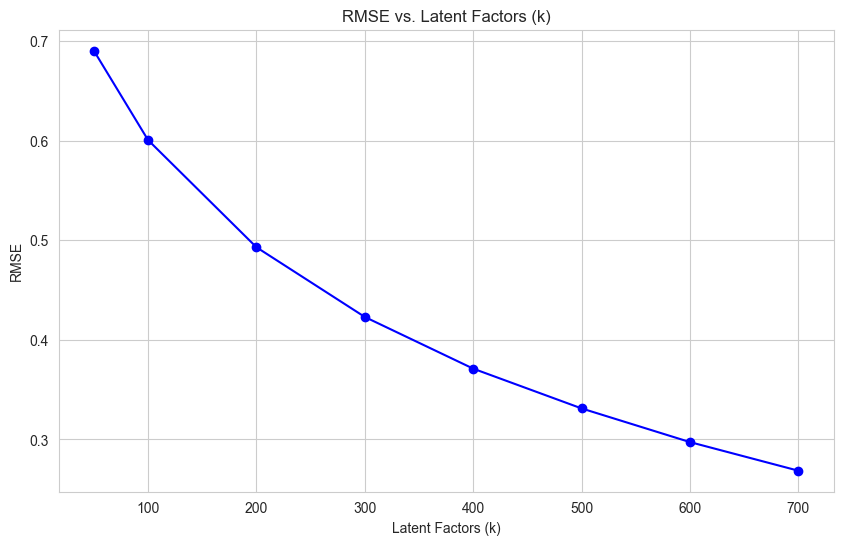

In [207]:
k_values = [50, 100, 200, 300, 400, 500, 600, 700]
rmse_values = []
for k in k_values:
    rmse = calculate_rmse(sparse_matrix, k)
    rmse_values.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. Latent Factors (k)')
plt.xlabel('Latent Factors (k)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [208]:
def recommend_items(user_id, original_matrix, predictions_df, num_recommendations=5):
    user_col_number = original_matrix.columns.get_loc(user_id)    
    sorted_user_predictions = predictions_df.iloc[:, user_col_number].sort_values(ascending=False)
    #print(sorted_user_predictions)
    user_data = original_matrix[user_id]
    #print(user_data[user_data != 0].index)
    return sorted_user_predictions.drop(user_data[user_data != 0].index).head(num_recommendations)
    # return recommendations.head(num_recommendations)
   

user_id = 'LydiaMorley' 
recommendations = recommend_items(user_id, UtAus_review, predicted_ratings_df)
print(recommendations)


item_id
200170    0.044101
17510     0.043667
413410    0.041808
349480    0.038164
102700    0.036182
Name: LydiaMorley, dtype: float64


In [209]:
recommendations_df = pd.DataFrame(recommendations).reset_index()
recommendations_df.columns = ['item_id', 'predicted_rating']
recommendations_df

,item_id,predicted_rating
0,200170,0.044101
1,17510,0.043667
2,413410,0.041808
3,349480,0.038164
4,102700,0.036182


## Recomendaciones con svd basico: 

In [210]:
merged_df = recommendations_df.merge(steam_games_df, left_on='item_id', right_on='id', how='left')
merged_df

,item_id,predicted_rating,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,200170,0.044101,Team17 Digital Ltd,[Strategy],Worms Revolution,Worms Revolution,http://store.steampowered.com/app/200170/Worms...,2012-10-10,"[Strategy, Multiplayer, Funny, Turn-Based Stra...",NaN,http://steamcommunity.com/app/200170/reviews/?...,"[Single-player, Multi-player, Co-op, Shared/Sp...",14.99,False,200170,Team17 Digital Ltd,Very Positive,73
1,17510,0.043667,NaN,[Indie],Age of Chivalry,Age of Chivalry,http://store.steampowered.com/app/17510/Age_of...,2007-12-01,"[Indie, Free to Play, Medieval, Mod, Action, M...",NaN,http://steamcommunity.com/app/17510/reviews/?b...,"[Multi-player, Co-op, Mods, Mods (require HL2)...",Free,False,17510,Team Chivalry,Very Positive,NaN
2,413410,0.041808,"Spike Chunsoft Co., Ltd.",[Adventure],Danganronpa: Trigger Happy Havoc,Danganronpa: Trigger Happy Havoc,http://store.steampowered.com/app/413410/Danga...,2016-02-18,"[Anime, Mystery, Visual Novel, Detective, Stor...",NaN,http://steamcommunity.com/app/413410/reviews/?...,"[Single-player, Steam Achievements, Full contr...",19.99,False,413410,"Spike Chunsoft Co., Ltd.,Abstraction Games",Overwhelmingly Positive,82
3,349480,0.038164,Steam Greenlight,"[Action, Free to Play, RPG]",Modular Combat,Modular Combat,http://store.steampowered.com/app/349480/Modul...,2008-01-18,"[Free to Play, Multiplayer, Action, Mod, FPS, ...",NaN,http://steamcommunity.com/app/349480/reviews/?...,"[Multi-player, Co-op, Captions available, Part...",Free Mod,False,349480,Ascension Entertainment LLC,Mostly Positive,NaN
4,102700,0.036182,En Masse Entertainment,"[Action, Free to Play]",A.V.A. Alliance of Valiant Arms™,A.V.A. Alliance of Valiant Arms™,http://store.steampowered.com/app/102700/AVA_A...,2011-06-14,"[Free to Play, FPS, Action, Multiplayer, Shoot...",NaN,http://steamcommunity.com/app/102700/reviews/?...,"[Multi-player, Online Multi-Player, Co-op, Onl...",Free to Play,False,102700,Red Duck Inc.,Mixed,NaN
